# 2. Linear models

In this exercise, we will implement the linear models that appear in the lecture slides ourselves.
We will start with the Iris data that you already know from the lecture.   

*Exercise*: Load the dataset "iris.csv" into a dataframe using the `pd.read_csv()` method from the pandas package!   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# load the iris dataset into a dataframe
df = pd.read_csv('iris.csv')
df

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


Now let's investigate how our data actually looks.   

*Exercise*: Do some exploratory data analysis (EDA). Look for example what columns `df` has, what datatypes the single columns are made off and check for missing values. What else can you say about the dataset?

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Name         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


## 2.1. Simple linear regression

First, let's look at the simple linear model that represents the relationship between PetalLength and SepalWidth. We will use the Python package statsmodels (`https://www.statsmodels.org`) to fit linear models. The specification of linear models works very similarly to the R examples in the lecture.

To better understand the `ols` formulas, it is worth taking a look here: (https://patsy.readthedocs.io/en/latest/formulas.html)

*Exercise*: Write down the general equation for regression in this markdown cell. Afterwards, modify the formula to represent the relationship between PetalLength and SepalWidth and plug it into `smf.ols()`.   

*Solution*:   
* Regression equation: $y=\beta_0+\beta_1 x_1+\beta_2 x_2+\beta_3 x_3+ ...$
* For our example: $y=\beta_0+\beta_1 x_1$

*Exercise*: Now fit the model and interpret the results! What do the coefficients, $R^2$, p-values mean? (see slide 17) Write everything down in this markdown cell!

In [3]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
 
# initialize the linear regression model
model = smf.ols('PetalLength ~ SepalWidth', data=df)
# fit/train the model
results = model.fit()
# print the results of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            PetalLength   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     31.79
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           8.43e-08
Time:                        13:58:01   Log-Likelihood:                -282.92
No. Observations:                 150   AIC:                             569.8
Df Residuals:                     148   BIC:                             575.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9847      0.936      9.598      0.0

## 2.2. Regularization

Now import the data from 'reg_data.csv' as a DataFrame and look what types of columns we have!

In [4]:
df2 = pd.read_csv('corr_data.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      101 non-null    float64
 1   x2      101 non-null    float64
 2   y       101 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


*Exercise*: Fit a linear model with y as the dependent variable and x1 and x2 as independent variables. Interpret the results again. What is the problem?

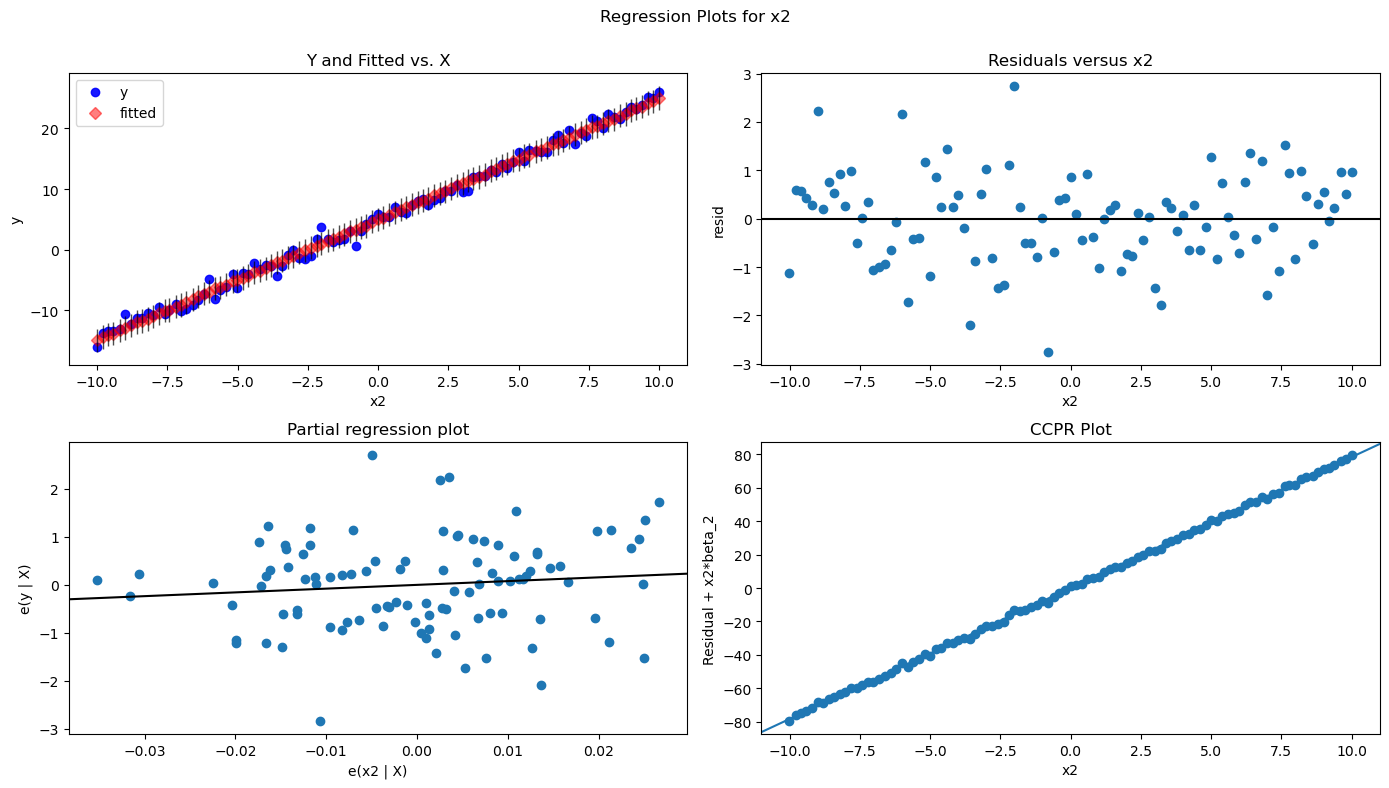

In [13]:
# initialize and train the model in one step -> save results
results = smf.ols('y ~ x1 + x2', data=df2).fit()
# get the parameters of the trained model
results.summary()

fig = plt.figure(figsize=(14,8))
# create regression plots
fig = sm.graphics.plot_regress_exog(results, 'x2', fig = fig)

*Exercise*: Have a deeper look into your data and tell me what problem we have with our data.

<Axes: >

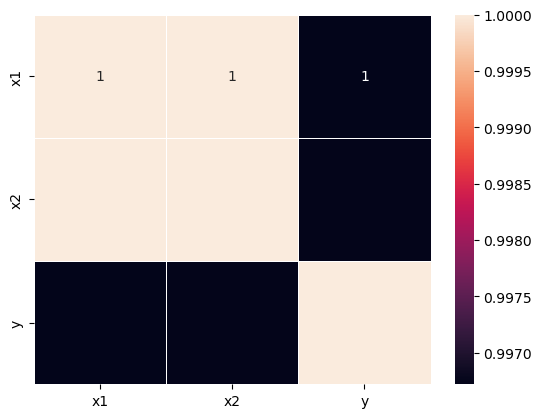

In [ ]:
sns.heatmap(df2.corr(), annot=True, cbar='colours', linewidth=.5)

*Exercise*: Use ridge regression/regularization to fit your linear model.

In [ ]:
# initialize the model
model = smf.ols('y ~ x1 + x2', data=df2)
#train the model and save the results
results = model.fit_regularized(L1_wt=0.1,alpha=1.9)
# get the parameters of the trained model
results.params

Intercept    1.763603
x1           0.977133
x2           0.960066
dtype: float64

## 2.3. Logitic regression

In machine learning, we are often not so much interested in the parameters of the model, but in the fact that the model provides good predictions. For such purposes, the logistic regression from the `sklearn` package is better suited -- there, things that are quite tedious in statsmodels, such as encoding the class, dealing with more than two classes, etc., are done directly. Have a look at the following documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

*Exercise*: Divide the Iris dataset that you already imported in `df` into two sets which contain the feature $X$ and target values $y$ respectively. Further seperate these two sets into two subsets: A training set that contains 80% of the data and a test set that contains the remaining 20% of the data. Use the `train_test_split()`-method of `sklearn` for this purpose.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split the iris data from 'df' into features (X) and target (y) value
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

*Exercise*: Train a logit model with the training data and generate predictions for the test data. Use the `LogisticRegression` class and its respective methods for this purpose. Afterwards look at the results by using the methods provided by `sklearn.metrics`. How many test examples have been classified correctly by your trained model?

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the classifier
clf = LogisticRegression().fit(X_train, y_train)

# compute predictions with your trained model and save these predictions in yhat
yhat = clf.predict(X_test)
 
# compute and print some classification metrics
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Additional exercise*: There is a way to also get the coefficients of a `LogisticRegression` model in sklearn. Try to figure out how to get these parameters. How many $\beta_i$  do we have in total?

In [ ]:
parameter = ['theta_'+str(i) for i in range(X_train.shape[1]+1)]
columns = ['intersect:x_0=1'] + list(X.columns.values)
sk_theta = []
for i in range (len(clf.intercept_)):
    theta = [clf.intercept_[i]]
    theta.extend(clf.coef_[i])
    sk_theta.append(theta)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'c1':sk_theta[0], 'c2':sk_theta[1], 'c3':sk_theta[2]})
parameter_df